# Modell för smittspridning av mässlingen med olika vaccinationsgrader

Syfte:
    Kör en agentbaserad SIR-modell för mässling vid olika vaccinationsgrader och visar hur populationen utvecklas över tid.

Input:  
Inga externa inputs via parametrar. Modellparametrar anges direkt i filen:  
N: antal agenter  
width, height: area  
initial_infected: antal infekterade vid start  
vaccination_rate: vaccinationsgrad  
mortality_rate: dödlighet  
timesteps: antal tidssteg   

Output:  
Grafer över S, I, R och D  
Plottar Re (effektivt reproduktionstal)  
Utskrift av resultat för varje simulering

## Importera Moduler

In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt
import numpy as np

## Definera modellparametrar

Modellen körs med 100 000 agenter som är distribuerade enligt (lägg in topografi?).

In [2]:
#Modellparametrar
N = 100000
width = 140
height = 70
initial_infected = 100
mortality_rate = 0.0021
timesteps = 100
num_runs = 5 # antal körningar 

## Vaccination rate: 0% (test för att bestämma R0)

In [3]:
#Ny simulering med 0% vaccinationsgrad

vaccination_rate_0 = 0

S_runs_0 = [] 
I_runs_0 = [] 
R_runs_0 = [] 
D_runs_0 = [] 
Re_runs_0 = [] 
R0_runs_0 = [] 

new_inf_runs_0 = []
total_new_inf_runs_0 = []

for run in range(num_runs):
 
    model_0 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_0, mortality_rate)

    for t in range(timesteps):
        model_0.step()

    model_df_0 = model_0.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_0.append(model_df_0["New Infected"].values)
    total_new_inf_runs_0.append(model_df_0["Total New Infected"].values)
    Re_runs_0.append(model_df_0["Re"].values) 
    R0_runs_0.append(model_df_0["R0"].values) 

    S_runs_0.append(model_df_0["Susceptible"].values)
    I_runs_0.append(model_df_0["Infected"].values)
    R_runs_0.append(model_df_0["Resistant"].values)
    D_runs_0.append(model_df_0["Dead"].values)

S_arr_0 = np.array(S_runs_0)
I_arr_0 = np.array(I_runs_0)
R_arr_0 = np.array(R_runs_0)
D_arr_0 = np.array(D_runs_0)
Re_arr_0 = np.array(Re_runs_0) 
R0_arr_0 = np.array(R0_runs_0) 
new_inf_runs_arr_0 = np.array(new_inf_runs_0)
total_new_inf_runs_arr_0 = np.array(total_new_inf_runs_0)

S_mean_0, S_std_0 = np.mean(S_arr_0, axis=0), np.std(S_arr_0, axis=0)
I_mean_0, I_std_0 = np.mean(I_arr_0, axis=0), np.std(I_arr_0, axis=0)
R_mean_0, R_std_0 = np.mean(R_arr_0, axis=0), np.std(R_arr_0, axis=0)
D_mean_0, D_std_0 = np.mean(D_arr_0, axis=0), np.std(D_arr_0, axis=0)
Re_mean_0, Re_std_0 = np.mean(Re_arr_0, axis=0), np.std(Re_arr_0, axis=0)
R0_mean_0, R0_std_0 = np.mean(R0_arr_0, axis=0), np.std(R0_arr_0, axis=0)

mean_new_0 = new_inf_runs_arr_0.mean(axis=0)
std_new_0 = new_inf_runs_arr_0.std(axis=0)
mean_total_0 = total_new_inf_runs_arr_0.mean(axis=0)
std_total_0 = total_new_inf_runs_arr_0.std(axis=0)


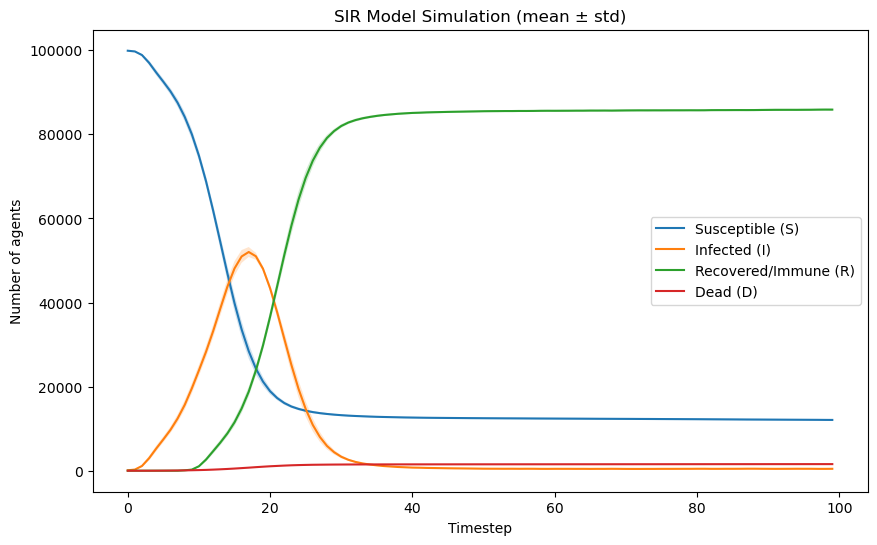

In [4]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean_0, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_0 - S_std_0, S_mean_0 + S_std_0, alpha=0.2)

plt.plot(I_mean_0, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_0 - I_std_0, I_mean_0 + I_std_0, alpha=0.2)

plt.plot(R_mean_0, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_0 - R_std_0, R_mean_0 + R_std_0, alpha=0.2)

plt.plot(D_mean_0, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_0 - D_std_0, D_mean_0 + D_std_0, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


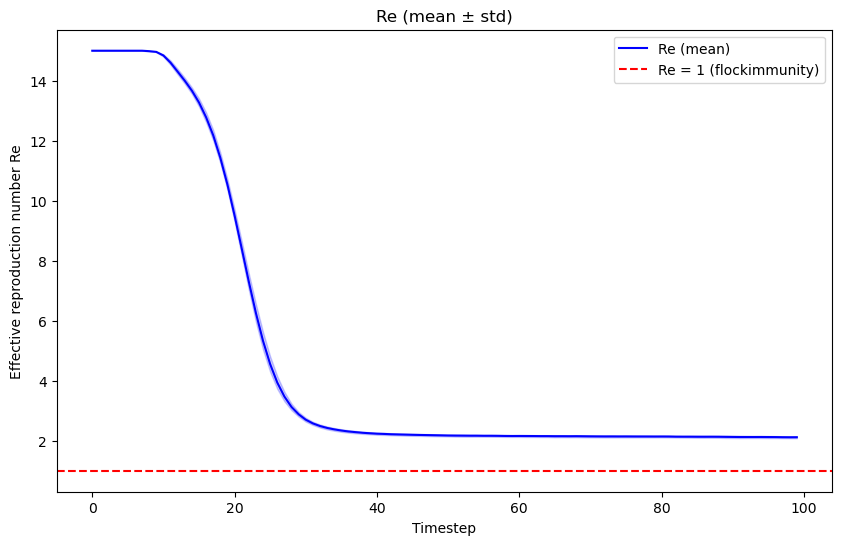

In [5]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean_0, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean_0 - Re_std_0, Re_mean_0 + Re_std_0, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()

In [6]:
model_df_0.head(10)

,Re,R0,New Infected,Susceptible,Infected,Resistant,Dead,Total New Infected
0,15.00000,0.000000,0,99900,100,0,0,0
1,15.00000,0.000000,195,99705,295,0,0,195
2,15.00000,0.000000,4227,98670,1330,0,0,4422
3,15.00000,2.333333,12897,96581,3416,0,3,17319
4,15.00000,2.142857,10901,94452,5541,0,7,28220
5,15.00000,4.550000,6149,92399,7581,0,20,34369
6,15.00000,4.775000,4506,89967,9993,0,40,38875
7,15.00000,4.290323,6031,87091,12847,0,62,44906
8,14.98530,5.914439,5170,83688,16125,98,89,50076
9,14.95695,15.831325,5507,79644,19945,287,124,55583


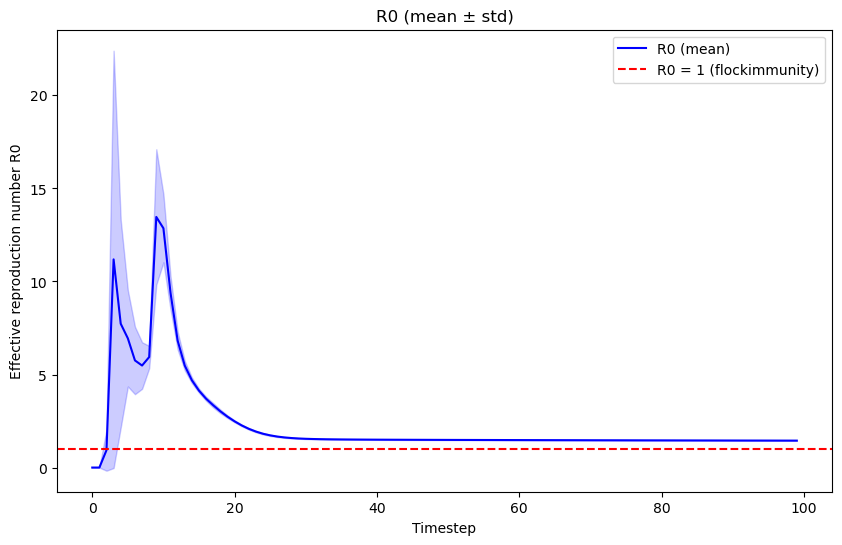

In [7]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, R0_mean_0, color='blue', label='R0 (mean)')
plt.fill_between(timesteps_range, R0_mean_0 - R0_std_0, R0_mean_0 + R0_std_0, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='R0 = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number R0")
plt.title(f"R0 (mean ± std)")
plt.legend()
plt.show()

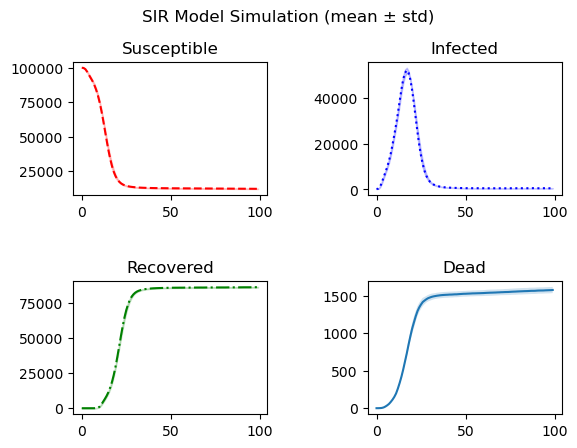

In [8]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_0,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_0 - S_std_0, S_mean_0 + S_std_0, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_0,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_0 - I_std_0, I_mean_0 + I_std_0, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_0,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_0 - R_std_0, R_mean_0 + R_std_0, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_0, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_0 - D_std_0, D_mean_0 + D_std_0, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()


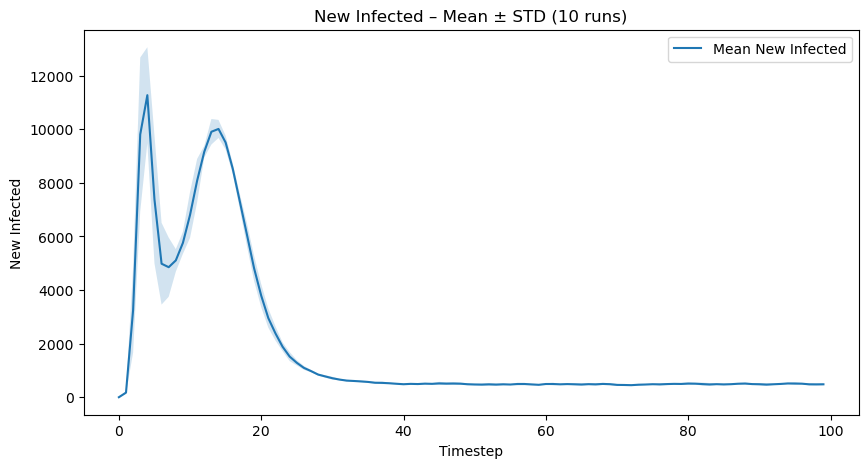

In [9]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_0, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_0 - std_new_0, mean_new_0 + std_new_0, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

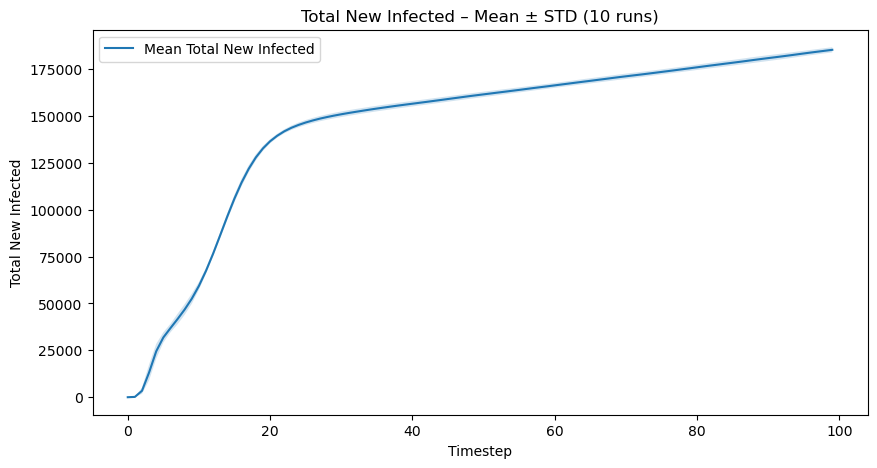

In [10]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_0, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_0 - std_total_0, mean_total_0 + std_total_0, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

## Vaccination rate: 50% (Lägre än IDAHO)

"Här körs SIR-modellen som simulerar smittspridning med en  vaccinationsgrad på 50%. Modellen körs 7 gånger och samlar data gällande antalet sucseptible (S), infected (I), recovered (R) och dead (D) efter 1000 dagar för respektive körning. Medelvärde och standardavvikelse beräknas."

In [11]:
vaccination_rate = 0.5

S_runs = [] 
I_runs = [] 
R_runs = [] 
D_runs = [] 
Re_runs = [] 
R0_runs = [] 
new_inf_runs = []
total_new_inf_runs = []

for run in range(num_runs):
 
    model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

    for t in range(timesteps):
        model.step()

    model_df = model.datacollector.get_model_vars_dataframe()
    
    new_inf_runs.append(model_df["New Infected"].values)
    total_new_inf_runs.append(model_df["Total New Infected"].values)
    Re_runs.append(model_df["Re"].values) 
    R0_runs.append(model_df["R0"].values) 

    S_runs.append(model_df["Susceptible"].values)
    I_runs.append(model_df["Infected"].values)
    R_runs.append(model_df["Resistant"].values)
    D_runs.append(model_df["Dead"].values)

S_arr = np.array(S_runs)
I_arr = np.array(I_runs)
R_arr = np.array(R_runs)
D_arr = np.array(D_runs)
Re_arr = np.array(Re_runs) 
R0_arr = np.array(R0_runs) 
new_inf_runs_arr = np.array(new_inf_runs)
total_new_inf_runs_arr = np.array(total_new_inf_runs)

S_mean, S_std = np.mean(S_arr, axis=0), np.std(S_arr, axis=0)
I_mean, I_std = np.mean(I_arr, axis=0), np.std(I_arr, axis=0)
R_mean, R_std = np.mean(R_arr, axis=0), np.std(R_arr, axis=0)
D_mean, D_std = np.mean(D_arr, axis=0), np.std(D_arr, axis=0)
Re_mean, Re_std = np.mean(Re_arr, axis=0), np.std(Re_arr, axis=0)
R0_mean, R0_std = np.mean(R0_arr, axis=0), np.std(R0_arr, axis=0)

mean_new = new_inf_runs_arr.mean(axis=0)
std_new = new_inf_runs_arr.std(axis=0)
mean_total = total_new_inf_runs_arr.mean(axis=0)
std_total = total_new_inf_runs_arr.std(axis=0)

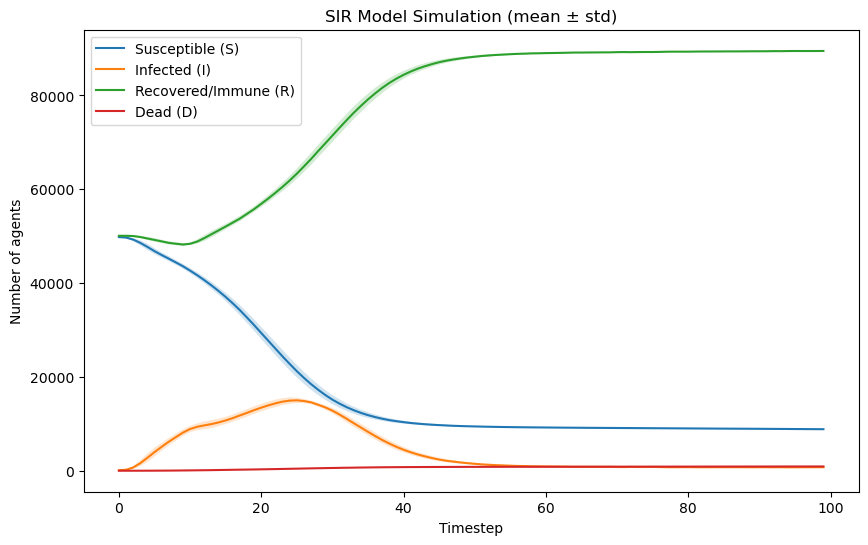

In [12]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, alpha=0.2)

plt.plot(I_mean, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.plot(R_mean, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, alpha=0.2)

plt.plot(D_mean, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


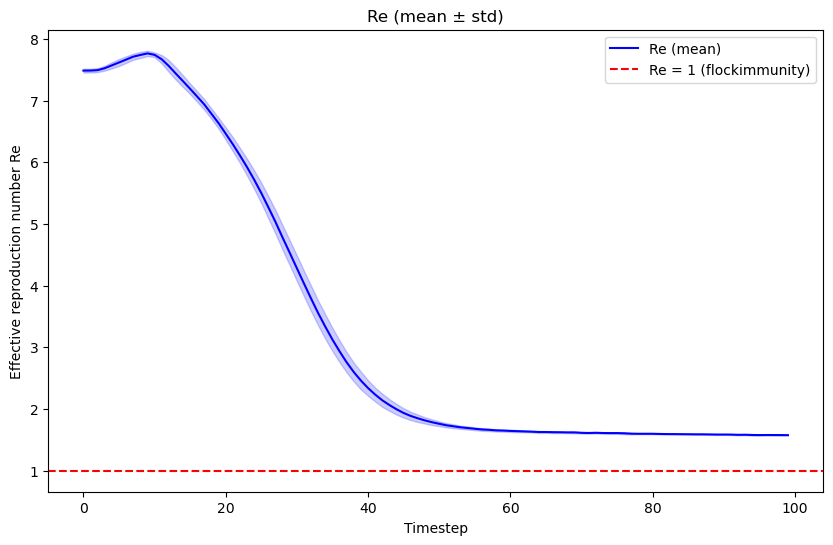

In [13]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean - Re_std, Re_mean + Re_std, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()


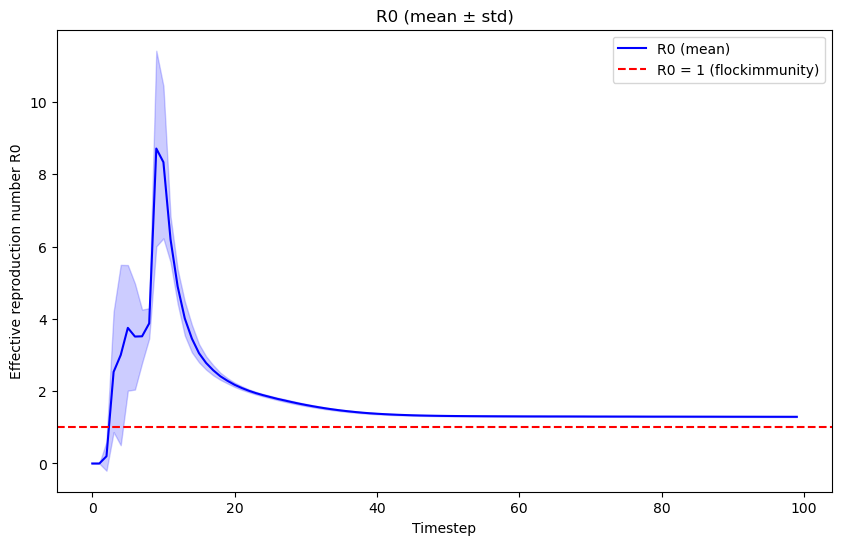

In [14]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, R0_mean, color='blue', label='R0 (mean)')
plt.fill_between(timesteps_range, R0_mean - R0_std, R0_mean + R0_std, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='R0 = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number R0")
plt.title(f"R0 (mean ± std)")
plt.legend()
plt.show()


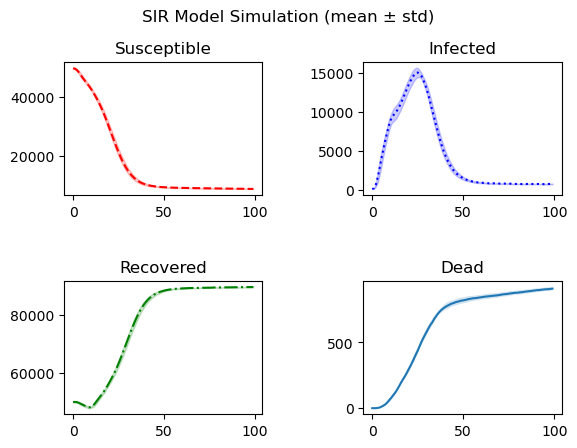

In [15]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()



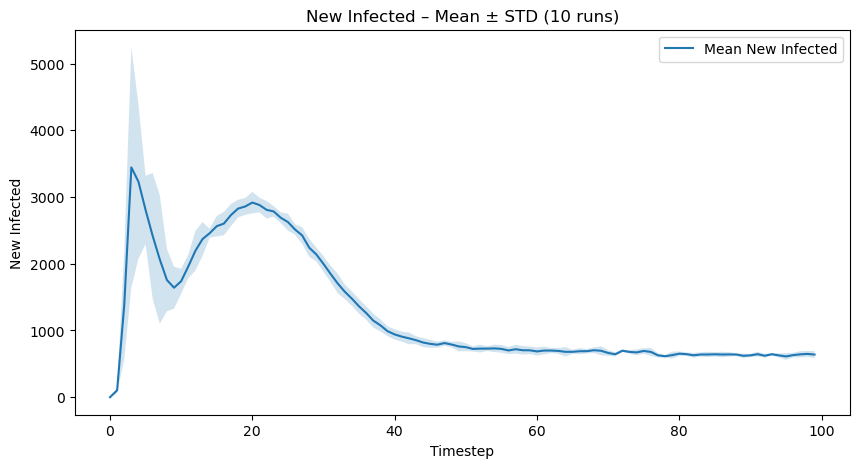

In [16]:
plt.figure(figsize=(10,5))
plt.plot(mean_new, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new - std_new, mean_new + std_new, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

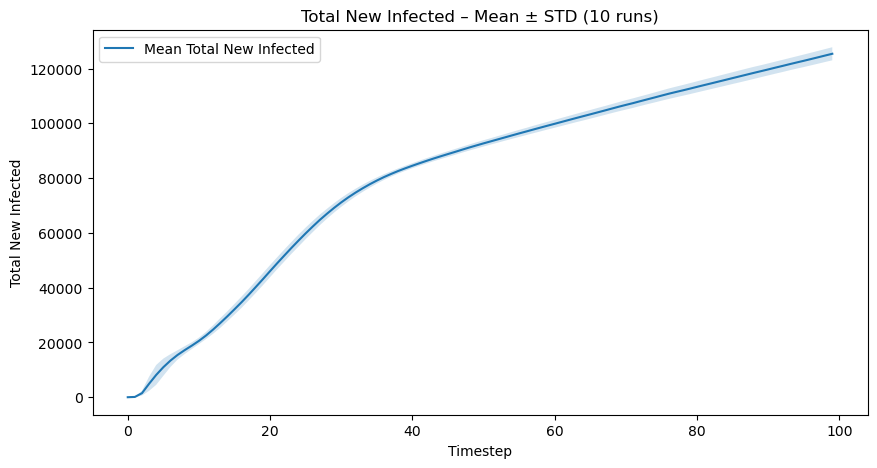

In [17]:
plt.figure(figsize=(10,5))
plt.plot(mean_total, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total - std_total, mean_total + std_total, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

In [18]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [20]:
# Medelvärdet = Re
print(model_df["Re"].mean())

3.3709289999999994


## Vaccination rate: 78.5% (IDAHO)

In [21]:
#Ny simulering med 78.5% vaccinationsgrad

vaccination_rate_2 = 0.785 

S_runs_2 = [] 
I_runs_2 = [] 
R_runs_2 = [] 
D_runs_2 = [] 
Re_runs_2 = [] 
R0_runs_2 = [] 

new_inf_runs_2 = []
total_new_inf_runs_2 = []

for run in range(num_runs):
 
    model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

    for t in range(timesteps):
        model_2.step()

    model_df_2 = model_2.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_2.append(model_df_2["New Infected"].values)
    total_new_inf_runs_2.append(model_df_2["Total New Infected"].values)
    Re_runs_2.append(model_df_2["Re"].values) 
    R0_runs_2.append(model_df_2["R0"].values) 

    S_runs_2.append(model_df_2["Susceptible"].values)
    I_runs_2.append(model_df_2["Infected"].values)
    R_runs_2.append(model_df_2["Resistant"].values)
    D_runs_2.append(model_df_2["Dead"].values)

S_arr_2 = np.array(S_runs_2)
I_arr_2 = np.array(I_runs_2)
R_arr_2 = np.array(R_runs_2)
D_arr_2 = np.array(D_runs_2)
Re_arr_2 = np.array(Re_runs_2) 
R0_arr_2 = np.array(R0_runs_2) 
new_inf_runs_arr_2 = np.array(new_inf_runs_2)
total_new_inf_runs_arr_2 = np.array(total_new_inf_runs_2)

S_mean_2, S_std_2 = np.mean(S_arr_2, axis=0), np.std(S_arr_2, axis=0)
I_mean_2, I_std_2 = np.mean(I_arr_2, axis=0), np.std(I_arr_2, axis=0)
R_mean_2, R_std_2 = np.mean(R_arr_2, axis=0), np.std(R_arr_2, axis=0)
D_mean_2, D_std_2 = np.mean(D_arr_2, axis=0), np.std(D_arr_2, axis=0)
Re_mean_2, Re_std_2 = np.mean(Re_arr_2, axis=0), np.std(Re_arr_2, axis=0)
R0_mean_2, R0_std_2 = np.mean(R0_arr_2, axis=0), np.std(R0_arr_2, axis=0)

mean_new_2 = new_inf_runs_arr_2.mean(axis=0)
std_new_2 = new_inf_runs_arr_2.std(axis=0)
mean_total_2 = total_new_inf_runs_arr_2.mean(axis=0)
std_total_2 = total_new_inf_runs_arr_2.std(axis=0)


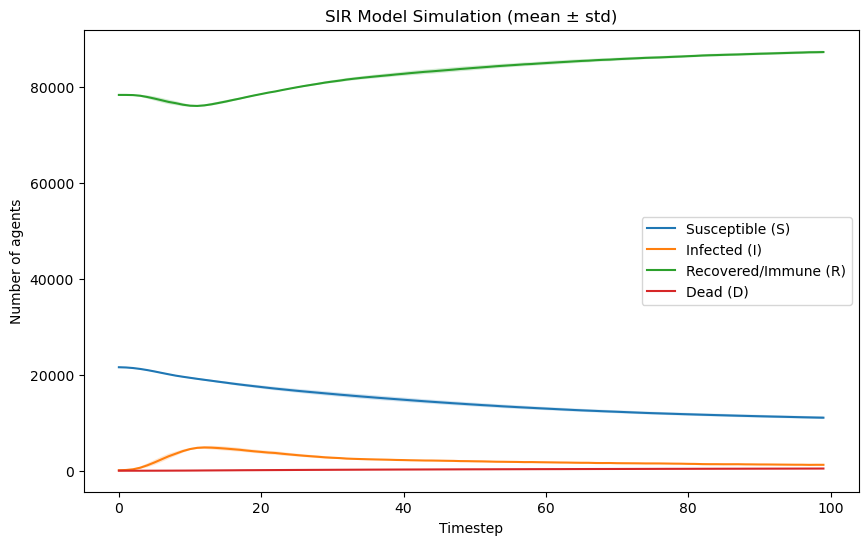

In [22]:
plt.figure(figsize=(10,6))
plt.plot(S_mean_2, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_2 - S_std_2, S_mean_2 + S_std_2, alpha=0.2)

plt.plot(I_mean_2, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_2 - I_std_2, I_mean_2 + I_std_2, alpha=0.2)

plt.plot(R_mean_2, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_2 - R_std_2, R_mean_2 + R_std_2, alpha=0.2)

plt.plot(D_mean_2, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_2 - D_std_2, D_mean_2 + D_std_2, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


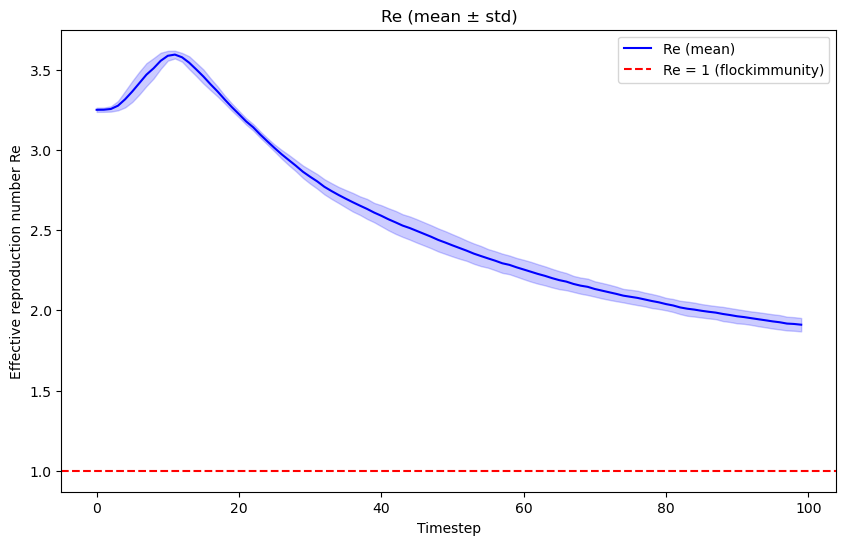

In [23]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean_2, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean_2 - Re_std_2, Re_mean_2 + Re_std_2, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()

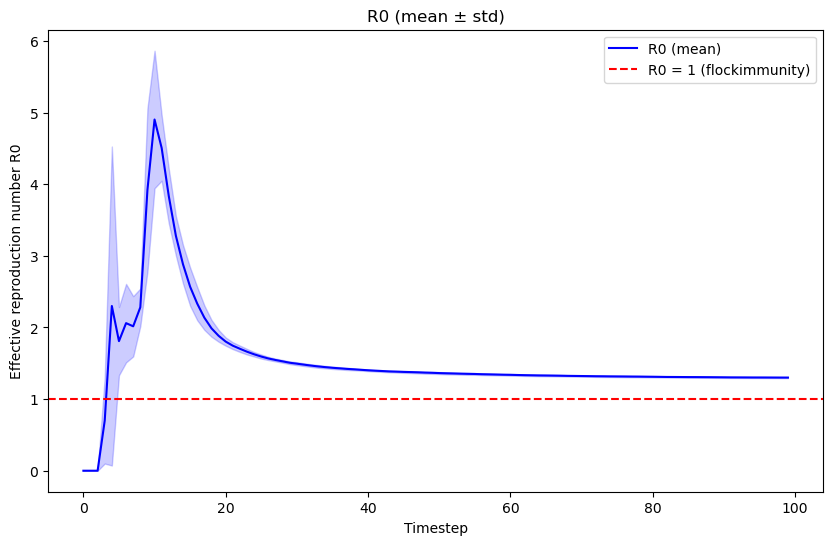

In [24]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, R0_mean_2, color='blue', label='R0 (mean)')
plt.fill_between(timesteps_range, R0_mean_2 - R0_std_2, R0_mean_2 + R0_std_2, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='R0 = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number R0")
plt.title(f"R0 (mean ± std)")
plt.legend()
plt.show()

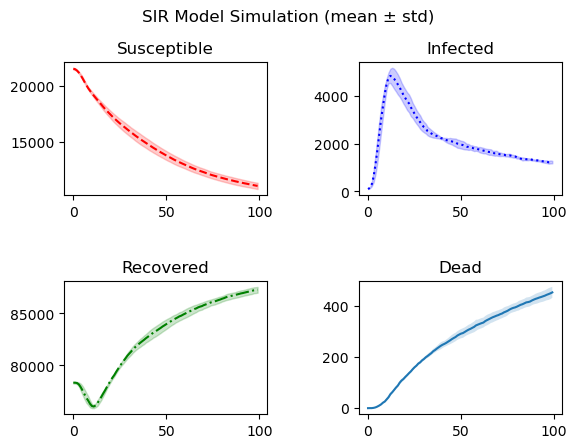

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_2,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_2 - S_std_2, S_mean_2 + S_std_2, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_2,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_2 - I_std_2, I_mean_2 + I_std_2, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_2,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_2 - R_std_2, R_mean_2 + R_std_2, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_2, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_2 - D_std_2, D_mean_2 + D_std_2, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()


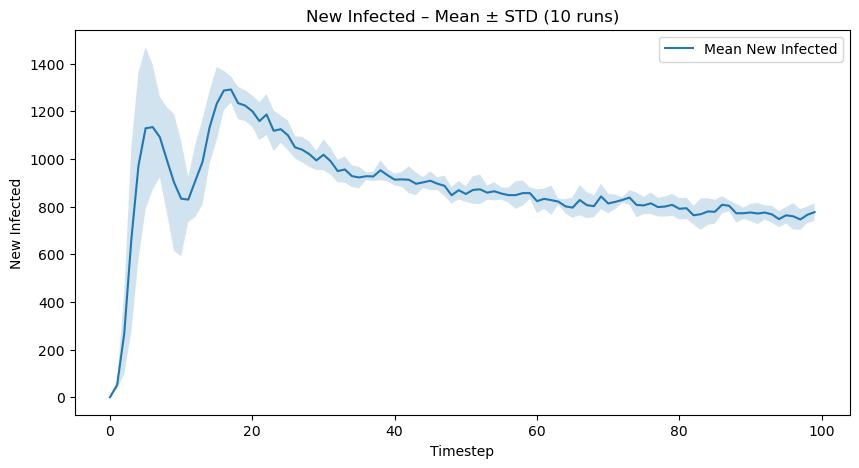

In [26]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_2, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_2 - std_new_2, mean_new_2 + std_new_2, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

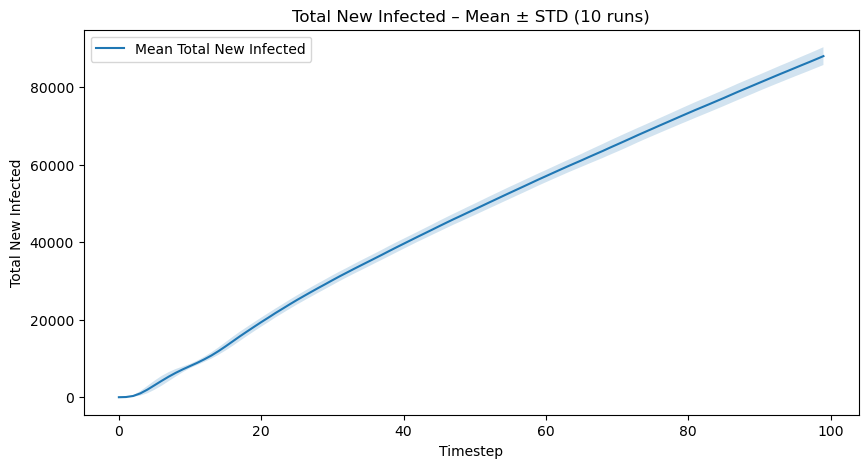

In [27]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_2, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_2 - std_total_2, mean_total_2 + std_total_2, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

## Vaccination rate: 95% (önskad vaccinationstäckning)

In [28]:
#Ny simulering med 95% vaccinationsgrad

vaccination_rate_3 = 0.95

S_runs_3 = [] 
I_runs_3 = [] 
R_runs_3 = [] 
D_runs_3 = [] 
Re_runs_3 = [] 
R0_runs_3 = [] 
new_inf_runs_3 = []
total_new_inf_runs_3 = []

for run in range(num_runs):
 
    model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

    for t in range(timesteps):
        model_3.step()

    model_df_3 = model_3.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_3.append(model_df_3["New Infected"].values)
    total_new_inf_runs_3.append(model_df_3["Total New Infected"].values)
    Re_runs_3.append(model_df_3["Re"].values) 
    R0_runs_3.append(model_df_3["R0"].values) 

    S_runs_3.append(model_df_3["Susceptible"].values)
    I_runs_3.append(model_df_3["Infected"].values)
    R_runs_3.append(model_df_3["Resistant"].values)
    D_runs_3.append(model_df_3["Dead"].values)

S_arr_3 = np.array(S_runs_3)
I_arr_3 = np.array(I_runs_3)
R_arr_3 = np.array(R_runs_3)
D_arr_3 = np.array(D_runs_3)
Re_arr_3 = np.array(Re_runs_3) 
R0_arr_3 = np.array(R0_runs_3) 
new_inf_runs_arr_3 = np.array(new_inf_runs_3)
total_new_inf_runs_arr_3 = np.array(total_new_inf_runs_3)

S_mean_3, S_std_3 = np.mean(S_arr_3, axis=0), np.std(S_arr_3, axis=0)
I_mean_3, I_std_3 = np.mean(I_arr_3, axis=0), np.std(I_arr_3, axis=0)
R_mean_3, R_std_3 = np.mean(R_arr_3, axis=0), np.std(R_arr_3, axis=0)
D_mean_3, D_std_3 = np.mean(D_arr_3, axis=0), np.std(D_arr_3, axis=0)
Re_mean_3, Re_std_3 = np.mean(Re_arr_3, axis=0), np.std(Re_arr_3, axis=0)
R0_mean_3, R0_std_3 = np.mean(R0_arr_3, axis=0), np.std(R0_arr_3, axis=0)

mean_new_3 = new_inf_runs_arr_3.mean(axis=0)
std_new_3 = new_inf_runs_arr_3.std(axis=0)
mean_total_3 = total_new_inf_runs_arr_3.mean(axis=0)
std_total_3 = total_new_inf_runs_arr_3.std(axis=0)

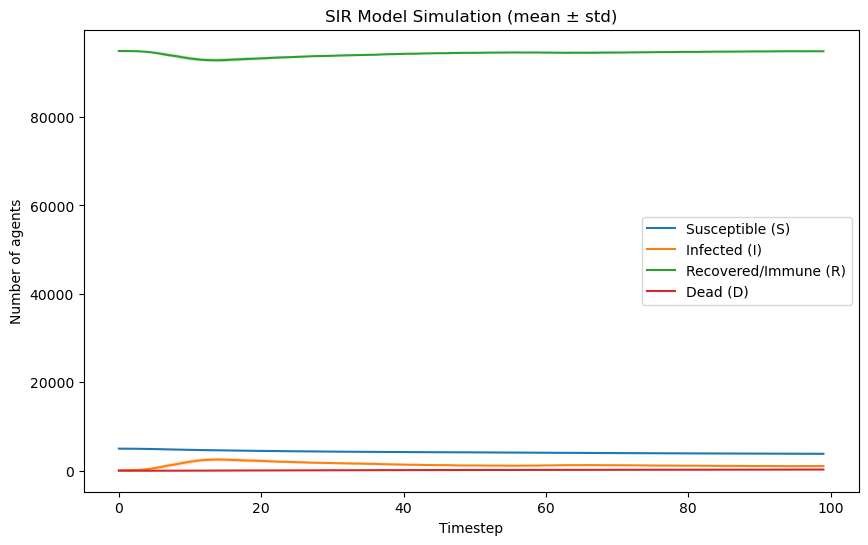

In [29]:
plt.figure(figsize=(10,6))
plt.plot(S_mean_3, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_3 - S_std_3, S_mean_3 + S_std_3, alpha=0.2)

plt.plot(I_mean_3, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_3 - I_std_3, I_mean_3 + I_std_3, alpha=0.2)

plt.plot(R_mean_3, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_3 - R_std_3, R_mean_3 + R_std_3, alpha=0.2)

plt.plot(D_mean_3, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_3 - D_std_3, D_mean_3 + D_std_3, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


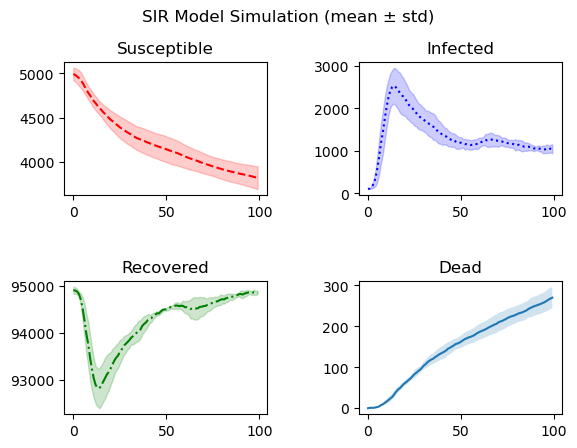

In [30]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_3,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_3 - S_std_3, S_mean_3 + S_std_3, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_3,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_3 - I_std_3, I_mean_3 + I_std_3, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_3,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_3 - R_std_3, R_mean_3 + R_std_3, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_3, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_3 - D_std_3, D_mean_3 + D_std_3, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()


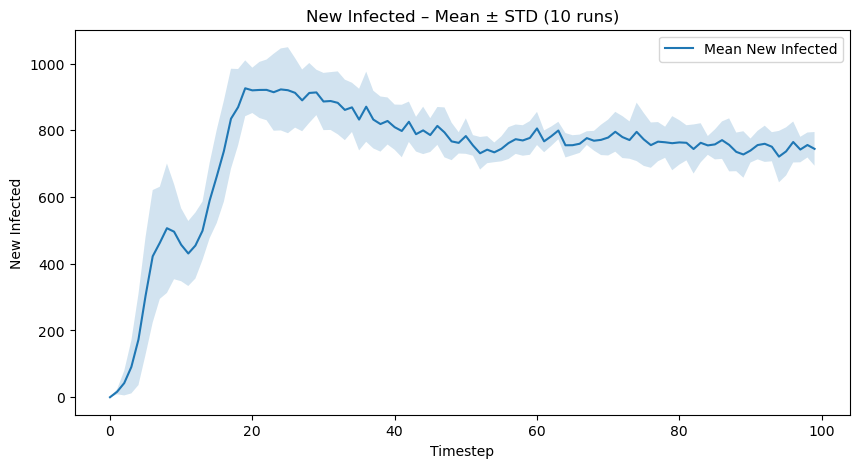

In [31]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_3, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_3 - std_new_3, mean_new_3 + std_new_3, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

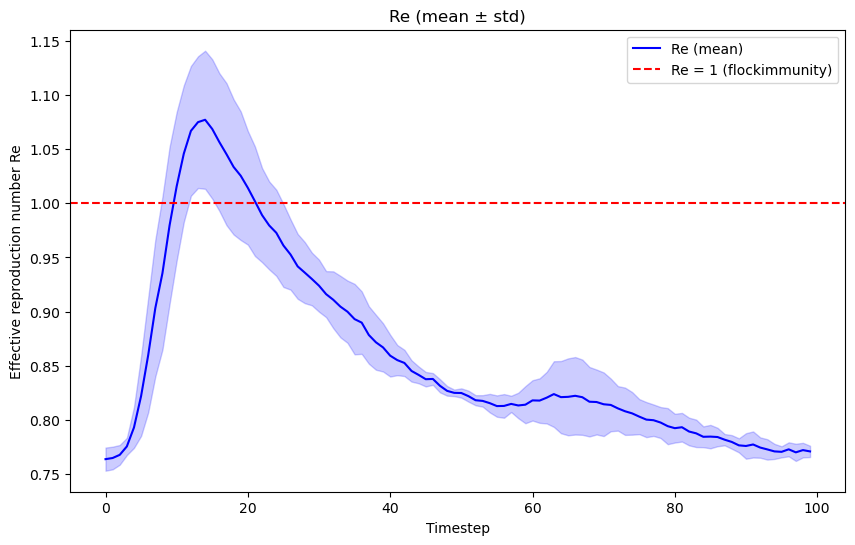

In [32]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean_3, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean_3 - Re_std_3, Re_mean_3 + Re_std_3, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()

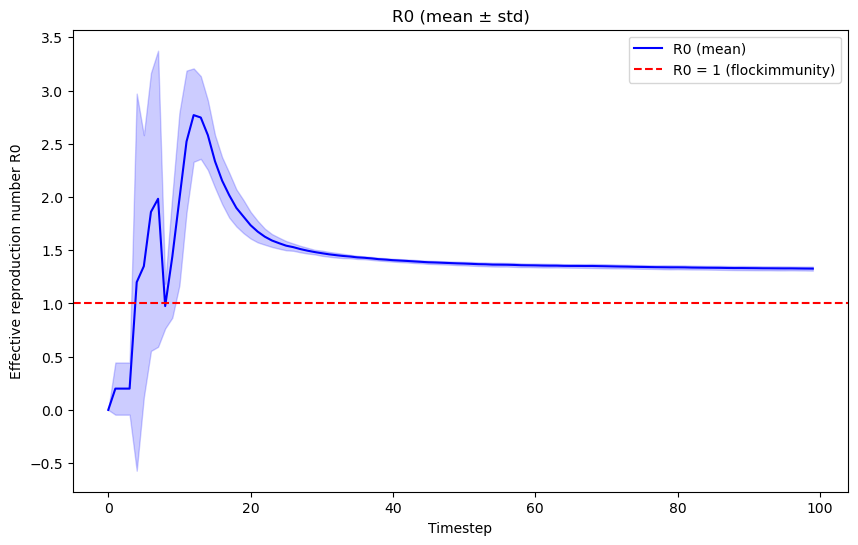

In [33]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, R0_mean_3, color='blue', label='R0 (mean)')
plt.fill_between(timesteps_range, R0_mean_3 - R0_std_3, R0_mean_3 + R0_std_3, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='R0 = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number R0")
plt.title(f"R0 (mean ± std)")
plt.legend()
plt.show()

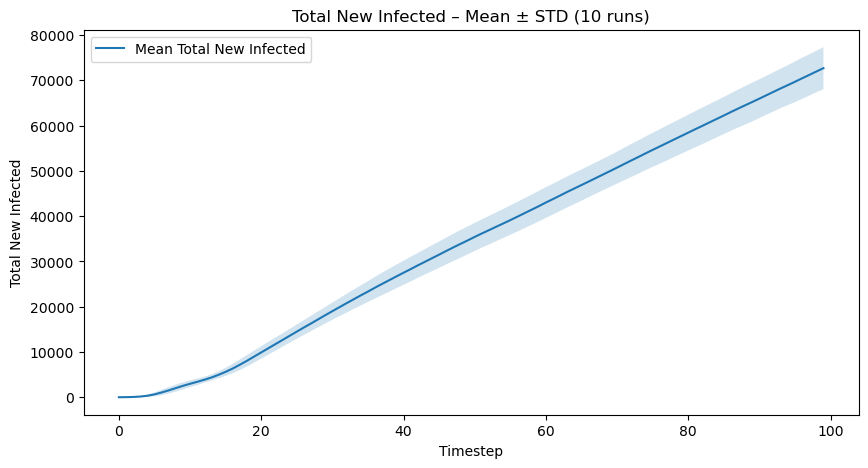

In [34]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_3, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_3 - std_total_3, mean_total_3 + std_total_3, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()